# Test the Simple atmospheric differential transparency Emulator Using the 2D Vectorisation

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2023/10/30
- last update : 2023/10/30


- This emulator is based from datagrid of atmospheric transparencies extracted from libradtran

- It is implemented in jax for auto differentiation

- access to data see https://setuptools.pypa.io/en/latest/userguide/datafiles.html

In [1]:
import numpy as np
import jax.numpy as jnp
import pandas as pd
import os
import seaborn as sns

In [2]:
#from simpleemulator.simpleatmemulator import SimpleAtmEmulator,find_data_path
#from simpleemulator.simpleatmemulator import Dict_Of_sitesAltitudes,Dict_Of_sitesPressures

In [3]:
from diffemulator.diffemulator  import SimpleDiffAtmEmulator,final_path_data
from diffemulator.diffemulator  import Dict_Of_sitesAltitudes,Dict_Of_sitesPressures

In [1]:
%matplotlib inline
#%matplotlib widget
#%matplotlib ipympl
#%matplotlib notebook

import matplotlib.pyplot as plt

# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 8),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm, SymLogNorm
cmap_chosen = "jet"

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Check emulator

In [6]:
site = 'LSST'
emul  = SimpleDiffAtmEmulator(obs_str=site)
path = final_path_data

Observatory LSST found in preselected observation sites


I0000 00:00:1698667889.120600       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [7]:
emul = SimpleDiffAtmEmulator()

Observatory LSST found in preselected observation sites


In [8]:
WL = emul.GetWL()

In [9]:
airmasses = emul.AIRMASS
NAM = len(airmasses)

In [10]:
hls_colors = sns.color_palette("hls", NAM)
#sns.palplot(hls_colors)

## Check emulator with Rayleigh scattering

In [11]:
transm = emul.vect2d_Rayleightransparency(WL,airmasses)

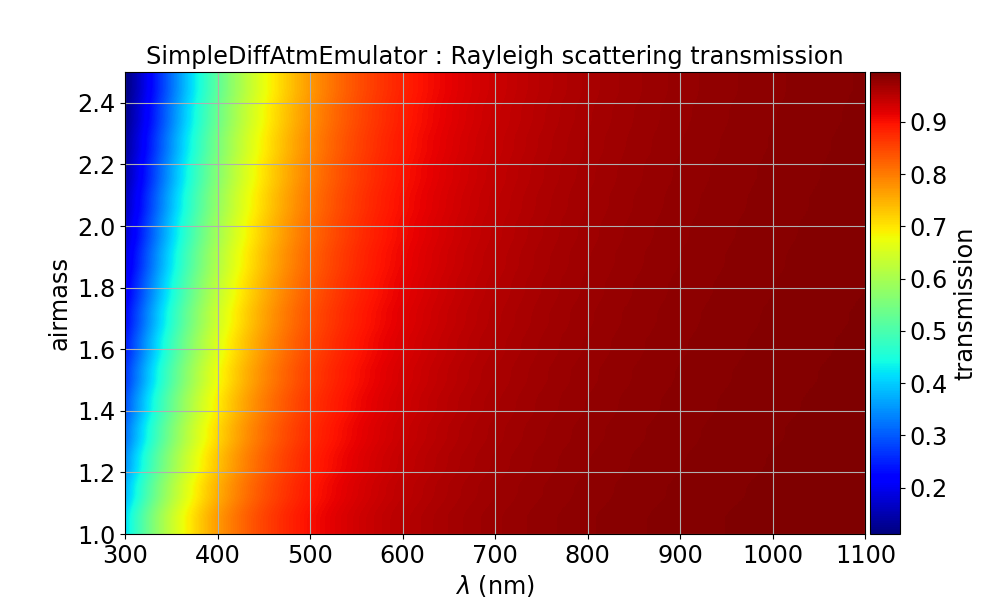

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

im = ax.imshow(transm,origin="lower",aspect="auto",extent=(WL.min(),WL.max(),airmasses.min(),airmasses.max()),cmap=cmap_chosen)
title = f"SimpleDiffAtmEmulator : Rayleigh scattering transmission"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("airmass")
ax.grid()

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='4%', pad=0.05)
cb = fig.colorbar(im, cax=cax, orientation='vertical')
cb.set_label("transmission")


## Check emulator with Oxygen O2 absorption

In [13]:
transm = emul.vect2d_O2abstransparency(WL,airmasses)

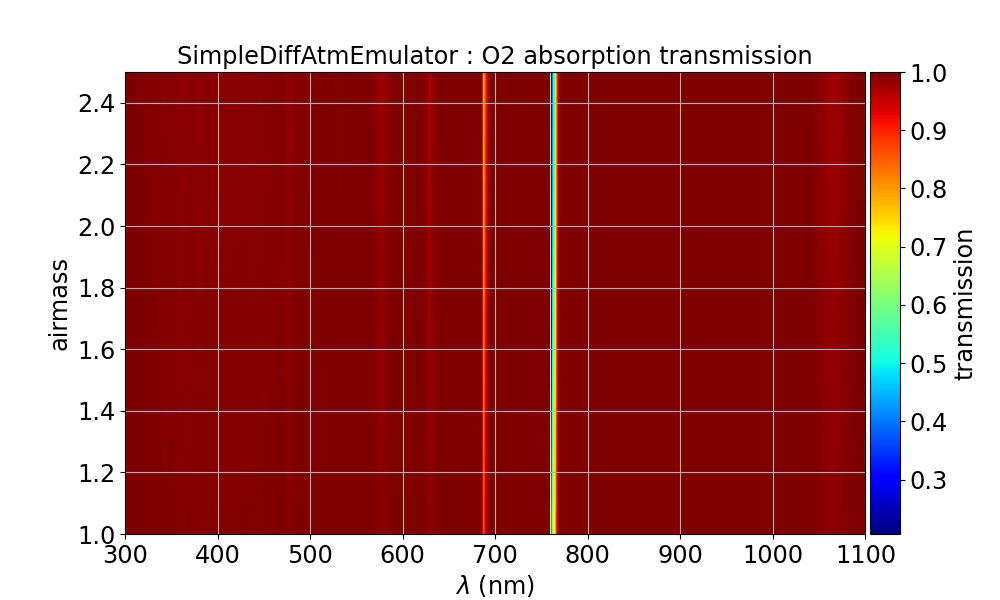

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

#im = ax.imshow(transm,origin="lower",aspect="auto",extent=(WL.min(),WL.max(),airmasses.min(),airmasses.max()),cmap=cmap_chosen,norm=LogNorm(vmin=0.01, vmax=1))
im = ax.imshow(transm,origin="lower",aspect="auto",extent=(WL.min(),WL.max(),airmasses.min(),airmasses.max()),cmap=cmap_chosen)
title = f"SimpleDiffAtmEmulator : O2 absorption transmission"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("airmass")
ax.grid()

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='4%', pad=0.05)
cb = fig.colorbar(im, cax=cax, orientation='vertical')
cb.set_label("transmission")

## Check emulator with PWV absorption

In [15]:
pwvs = emul.PWV
NPWV=len(pwvs)

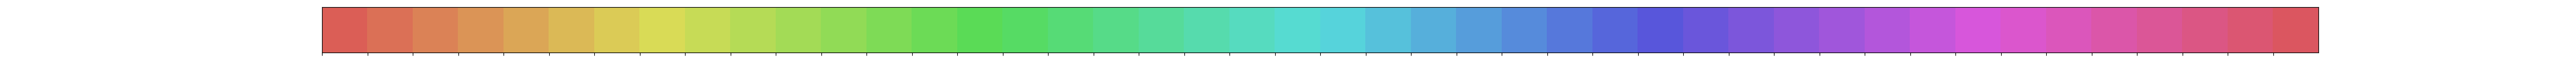

In [16]:
hls_colors = sns.color_palette("hls", NPWV)
sns.palplot(hls_colors)

In [17]:
pwv = 5.0
am=1
transma = emul.vect2da_PWVabstransparency(WL,airmasses,pwv)
transmb = emul.vect2db_PWVabstransparency(WL,am,pwvs)

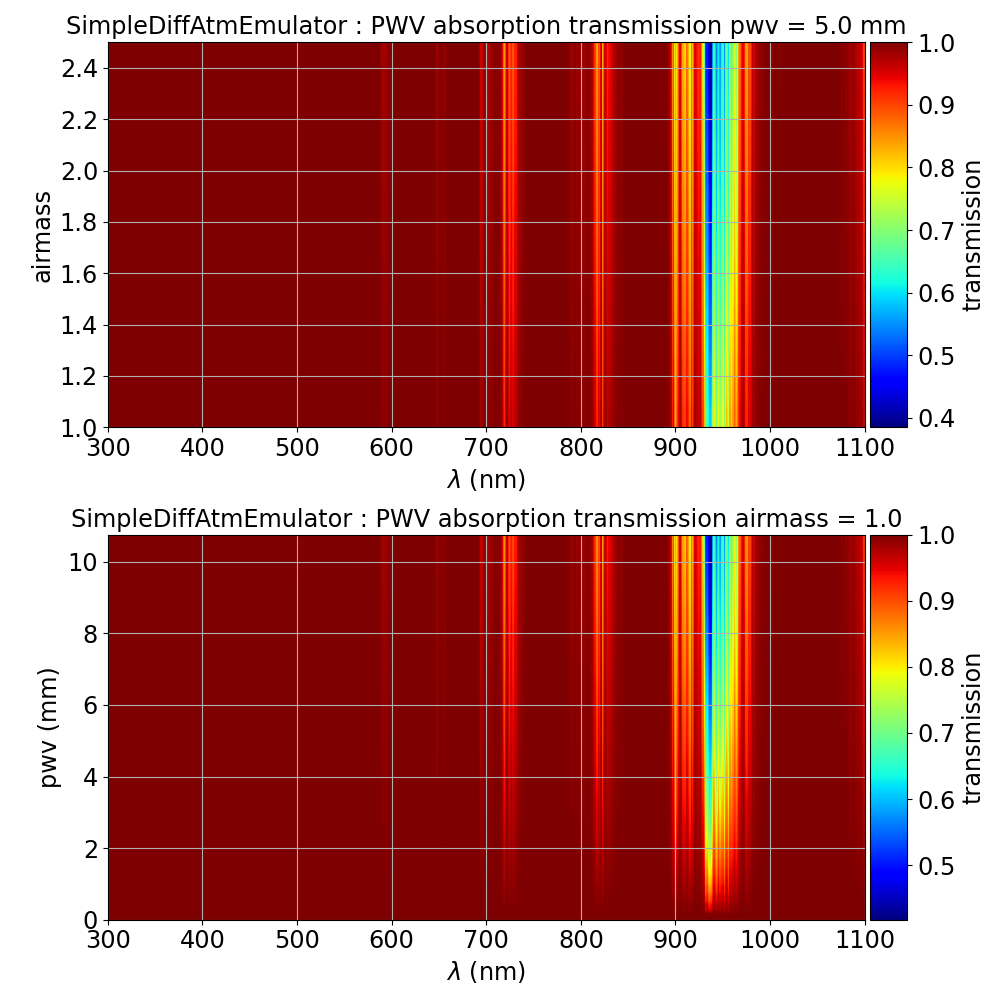

In [18]:
fig, axs = plt.subplots(2,1,figsize=(10,10))

ax1 = axs[0]
ax2 = axs[1]

im1 = ax1.imshow(transma,origin="lower",aspect="auto",extent=(WL.min(),WL.max(),airmasses.min(),airmasses.max()),cmap=cmap_chosen)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cb1 = fig.colorbar(im1, cax=cax1, orientation='vertical')
cb1.set_label("transmission")

title1 = f"SimpleDiffAtmEmulator : PWV absorption transmission pwv = {pwv:.1f} mm"
ax1.set_title(title1)
ax1.set_xlabel("$\lambda$ (nm)")
ax1.set_ylabel("airmass")
ax1.grid()

im2 = ax2.imshow(transmb,origin="lower",aspect="auto",extent=(WL.min(),WL.max(),pwvs.min(),pwvs.max()),cmap=cmap_chosen)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cb2 = fig.colorbar(im2, cax=cax2, orientation='vertical')
cb2.set_label("transmission")

title2 = f"SimpleDiffAtmEmulator : PWV absorption transmission airmass = {am:.1f}"
ax2.set_title(title2)
ax2.set_xlabel("$\lambda$ (nm)")
ax2.set_ylabel("pwv (mm)")
ax2.grid()

plt.tight_layout()

#divider = make_axes_locatable(ax)
#cax = divider.append_axes('right', size='4%', pad=0.05)
#fig.colorbar(im1, cax=cax, orientation='vertical')

## Check emulator with Ozone absorption

In [19]:
ozs = emul.OZ
NOZ = len(ozs)

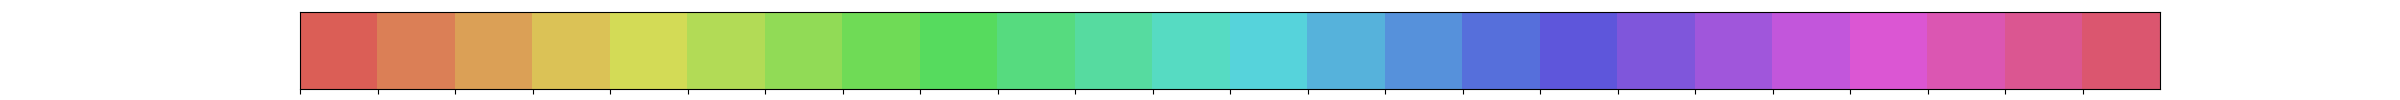

In [20]:
hls_colors = sns.color_palette("hls", NOZ)
sns.palplot(hls_colors)

In [21]:
oz = 400.
am=1
transma = emul.vect2da_OZabstransparency(WL,airmasses,oz)
transmb = emul.vect2db_OZabstransparency(WL,am,ozs)

In [22]:
ozs

Array([  0,  25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300,
       325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575],      dtype=int32)

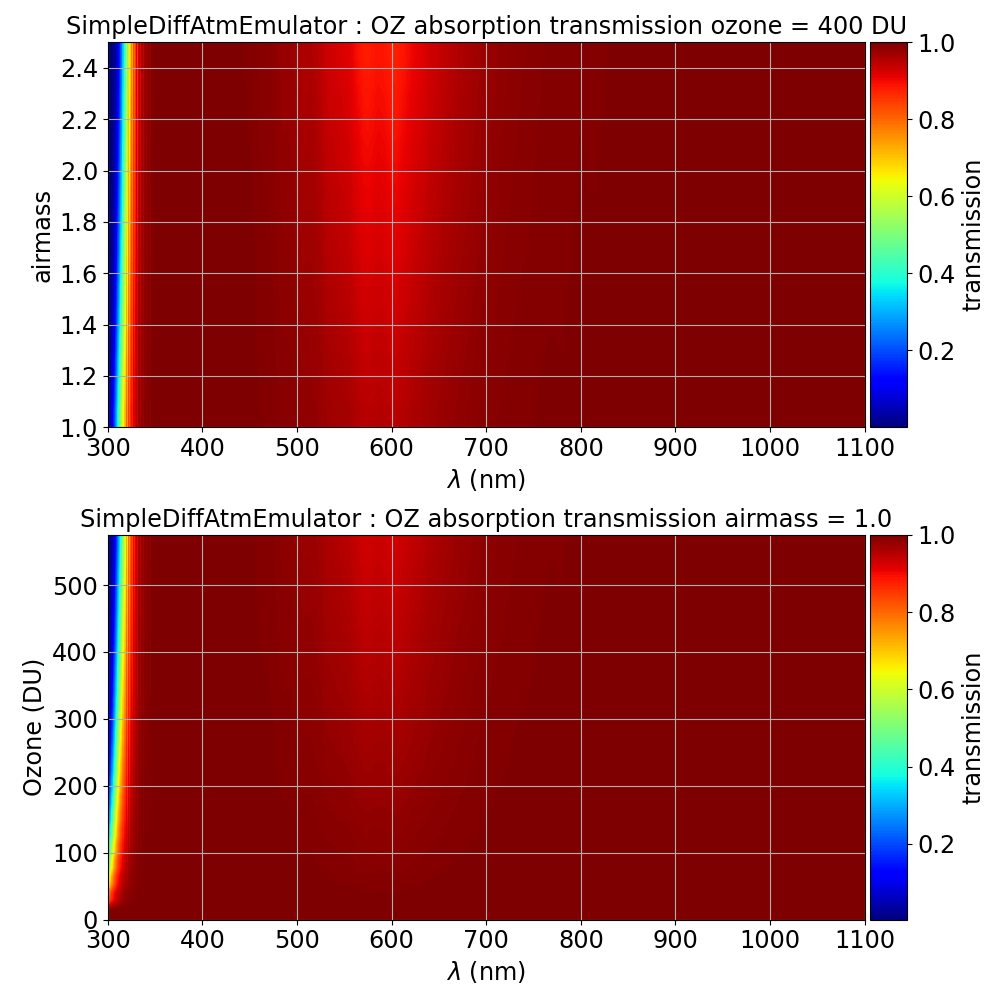

In [23]:
fig, axs = plt.subplots(2,1,figsize=(10,10))

ax1 = axs[0]
ax2 = axs[1]

im1 = ax1.imshow(transma,origin="lower",aspect="auto",extent=(WL.min(),WL.max(),airmasses.min(),airmasses.max()),cmap=cmap_chosen)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cb1 = fig.colorbar(im1, cax=cax1, orientation='vertical')
cb1.set_label("transmission")

title1 = f"SimpleDiffAtmEmulator : OZ absorption transmission ozone = {oz:.0f} DU"
ax1.set_title(title1)
ax1.set_xlabel("$\lambda$ (nm)")
ax1.set_ylabel("airmass")
ax1.grid()

im2 = ax2.imshow(transmb,origin="lower",aspect="auto",extent=(WL.min(),WL.max(),ozs.min(),ozs.max()),cmap=cmap_chosen)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cb2 = fig.colorbar(im2, cax=cax2, orientation='vertical')
cb2.set_label("transmission")

title2 = f"SimpleDiffAtmEmulator : OZ absorption transmission airmass = {am:.1f}"
ax2.set_title(title2)
ax2.set_xlabel("$\lambda$ (nm)")
ax2.set_ylabel("Ozone (DU)")
ax2.grid()

plt.tight_layout()


## Check with aerosols

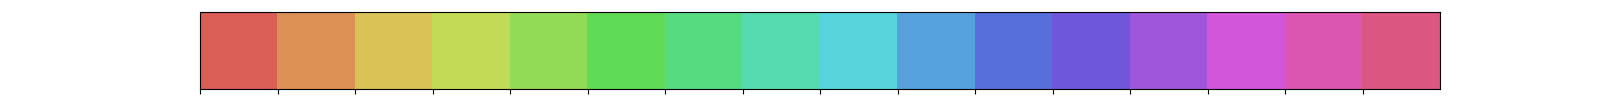

In [24]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

In [25]:
tau = 0.05
beta = - 1.0
taus = jnp.linspace(0,0.5,10)
betas = jnp.linspace(-3,0,10)
am=1
transma = emul.vect2da_Aerosolstransparency(WL,airmasses,tau,beta)
transmb = emul.vect2db_Aerosolstransparency(WL,am,taus,beta)
transmc = emul.vect2dc_Aerosolstransparency(WL,am,tau,betas)

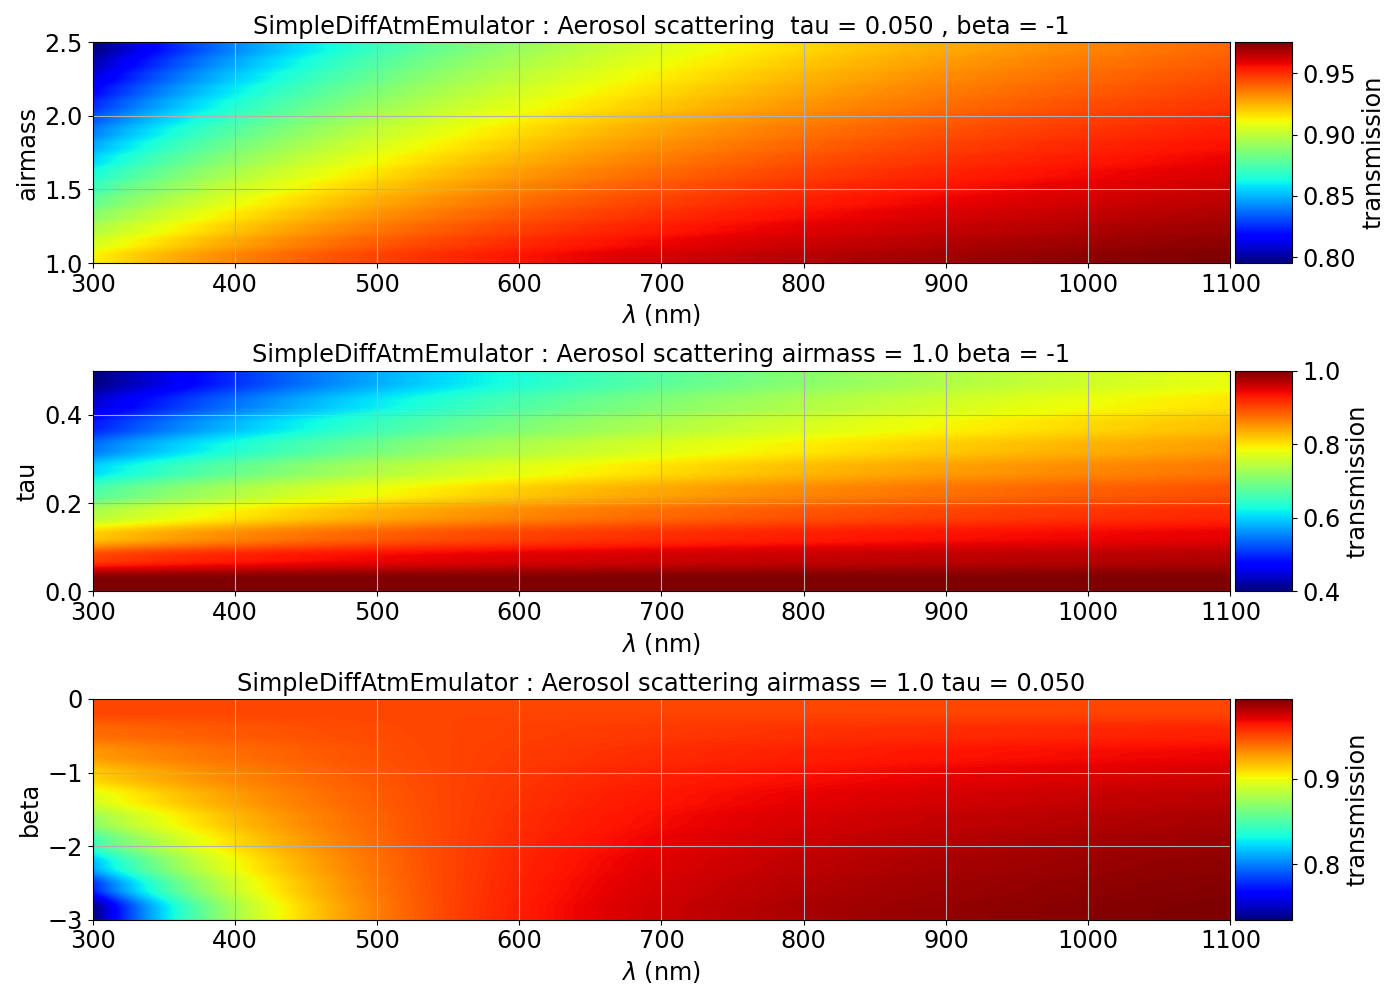

In [26]:
fig, axs = plt.subplots(3,1,figsize=(14,10))

ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

im1 = ax1.imshow(transma,origin="lower",aspect="auto",extent=(WL.min(),WL.max(),airmasses.min(),airmasses.max()),cmap=cmap_chosen)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cb1 = fig.colorbar(im1, cax=cax1, orientation='vertical')
cb1.set_label("transmission")

title1 = f"SimpleDiffAtmEmulator : Aerosol scattering  tau = {tau:.3f} , beta = {beta:.0f}"
ax1.set_title(title1)
ax1.set_xlabel("$\lambda$ (nm)")
ax1.set_ylabel("airmass")
ax1.grid()

im2 = ax2.imshow(transmb,origin="lower",aspect="auto",extent=(WL.min(),WL.max(),taus.min(),taus.max()),cmap=cmap_chosen)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cb2 = fig.colorbar(im2, cax=cax2, orientation='vertical')
cb2.set_label("transmission")

title2 = f"SimpleDiffAtmEmulator : Aerosol scattering airmass = {am:.1f} beta = {beta:.0f}"
ax2.set_title(title2)
ax2.set_xlabel("$\lambda$ (nm)")
ax2.set_ylabel("tau")
ax2.grid()


im3 = ax3.imshow(transmc,origin="lower",aspect="auto",extent=(WL.min(),WL.max(),betas.min(),betas.max()),cmap=cmap_chosen)
divider = make_axes_locatable(ax3)
cax3 = divider.append_axes('right', size='5%', pad=0.05)
cb3 = fig.colorbar(im3, cax=cax3, orientation='vertical')
cb3.set_label("transmission")

title3 = f"SimpleDiffAtmEmulator : Aerosol scattering airmass = {am:.1f} tau = {tau:.3f}"
ax3.set_title(title3)
ax3.set_xlabel("$\lambda$ (nm)")
ax3.set_ylabel("beta")
ax3.grid()



plt.tight_layout()

## Test all combined transmission

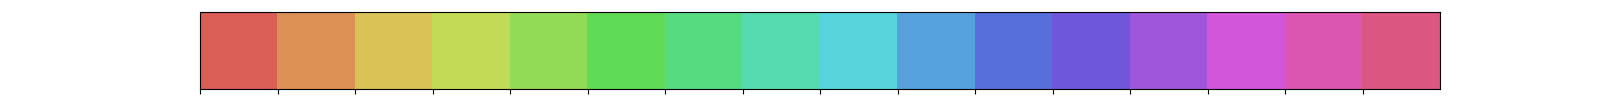

In [27]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

### Without aerosols

In [28]:
ozs

Array([  0,  25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300,
       325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575],      dtype=int32)

In [29]:
pwv = 5.0
oz = 400.
am=1
transma = emul.vect2da_Griddedtransparency(WL,airmasses,pwv,oz)
transmb = emul.vect2db_Griddedtransparency(WL,am,pwvs,oz)
transmc = emul.vect2dc_Griddedtransparency(WL,am,pwv,ozs)

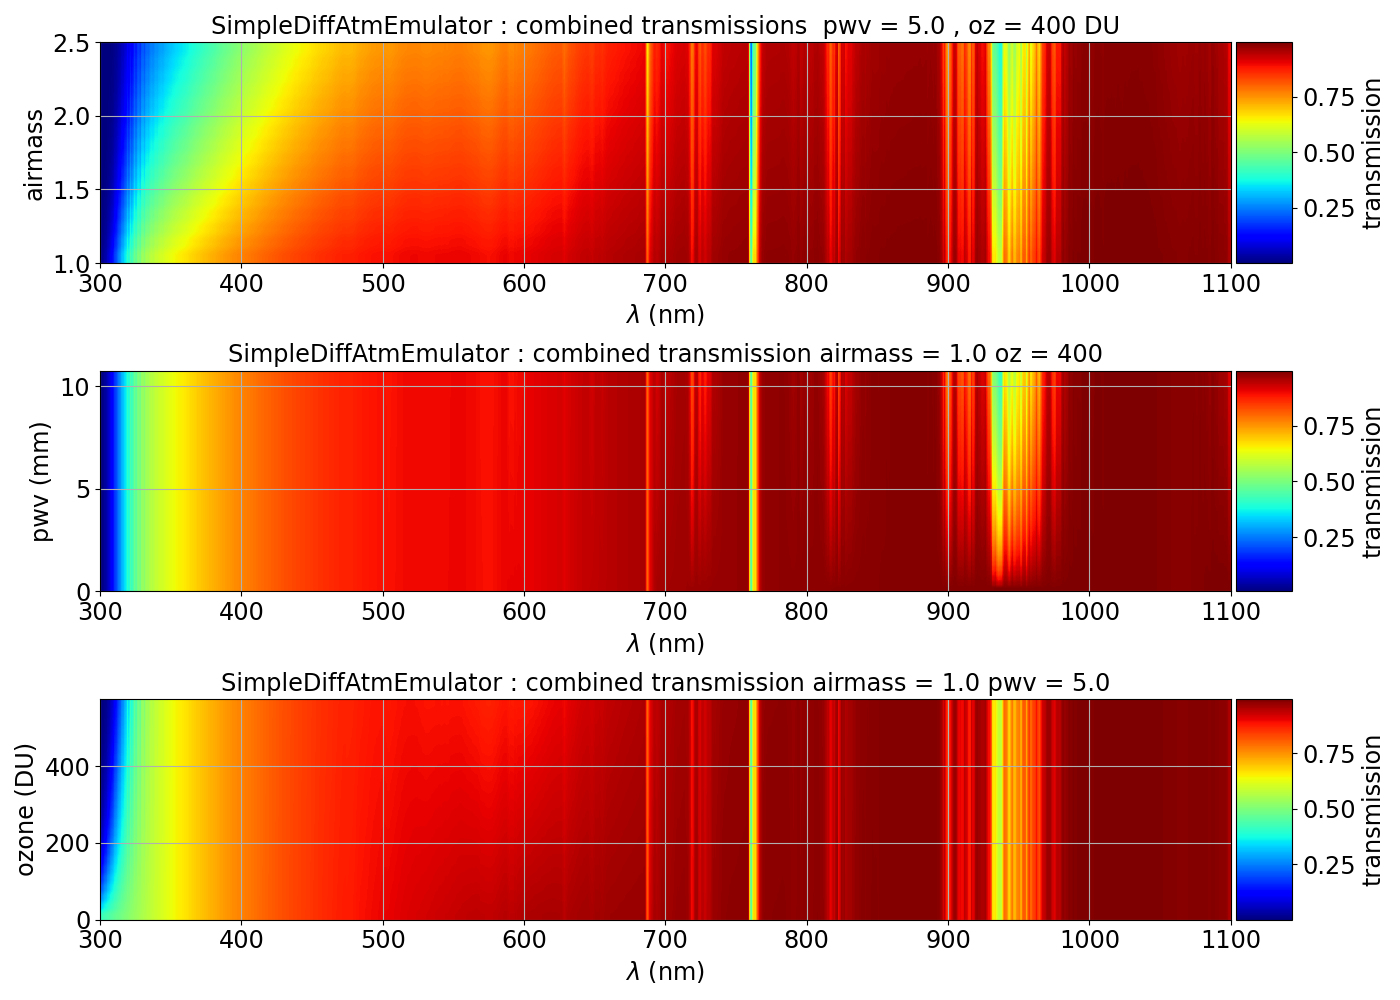

In [30]:
ig, axs = plt.subplots(3,1,figsize=(14,10))

ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

im1 = ax1.imshow(transma,origin="lower",aspect="auto",extent=(WL.min(),WL.max(),airmasses.min(),airmasses.max()),cmap=cmap_chosen)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cb1 = fig.colorbar(im1, cax=cax1, orientation='vertical')
cb1.set_label("transmission")

title1 = f"SimpleDiffAtmEmulator : combined transmissions  pwv = {pwv:.1f} , oz = {oz:.0f} DU"
ax1.set_title(title1)
ax1.set_xlabel("$\lambda$ (nm)")
ax1.set_ylabel("airmass")
ax1.grid()

im2 = ax2.imshow(transmb,origin="lower",aspect="auto",extent=(WL.min(),WL.max(),pwvs.min(),pwvs.max()),cmap=cmap_chosen)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cb2 = fig.colorbar(im2, cax=cax2, orientation='vertical')
cb2.set_label("transmission")

title2 = f"SimpleDiffAtmEmulator : combined transmission airmass = {am:.1f} oz = {oz:.0f}"
ax2.set_title(title2)
ax2.set_xlabel("$\lambda$ (nm)")
ax2.set_ylabel("pwv (mm)")
ax2.grid()


im3 = ax3.imshow(transmc,origin="lower",aspect="auto",extent=(WL.min(),WL.max(),ozs.min(),ozs.max()),cmap=cmap_chosen)
divider = make_axes_locatable(ax3)
cax3 = divider.append_axes('right', size='5%', pad=0.05)
cb3 = fig.colorbar(im3, cax=cax3, orientation='vertical')
cb3.set_label("transmission")

title3 = f"SimpleDiffAtmEmulator : combined transmission airmass = {am:.1f} pwv = {pwv:.1f}"
ax3.set_title(title3)
ax3.set_xlabel("$\lambda$ (nm)")
ax3.set_ylabel("ozone (DU)")
ax3.grid()



plt.tight_layout()